In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
vanilla = pd.read_csv('per_moa_performance/level5_vanilla_moa_performance.csv').set_index('MOA')['zscore']
vanilla_leaveOut = pd.read_csv('per_moa_performance/level5_vanilla_leaveIntermediateOut_moa_performance.csv').set_index('MOA')['zscore']
beta = pd.read_csv('per_moa_performance/level5_beta_moa_performance.csv').set_index('MOA')['zscore']
beta_leaveOut = pd.read_csv('per_moa_performance/level5_beta_leaveIntermediateOut_moa_performance.csv').set_index('MOA')['zscore']
mmd = pd.read_csv('per_moa_performance/level5_mmd_moa_performance.csv').set_index('MOA')['zscore']
mmd_leaveOut = pd.read_csv('per_moa_performance/level5_mmd_leaveIntermediateOut_moa_performance.csv').set_index('MOA')['zscore']

In [4]:
vanilla_df = pd.concat([vanilla, vanilla_leaveOut], axis = 1).assign(moaType = 'Not left out').reset_index()
beta_df = pd.concat([beta, beta_leaveOut], axis = 1).assign(moaType = 'Not left out').reset_index()
mmd_df = pd.concat([mmd, mmd_leaveOut], axis = 1).assign(moaType = 'Not left out').reset_index()

In [5]:
vanilla_df.columns = ['MOA', 'original', 'leaveOut', '']
beta_df.columns = ['MOA', 'original', 'leaveOut', '']
mmd_df.columns = ['MOA', 'original', 'leaveOut', '']

In [6]:
vanilla_index = max((vanilla_df[vanilla_df['original'] < -1]).index.to_list())
beta_index = max((beta_df[vanilla_df['original'] < -1]).index.to_list())
mmd_index = max((mmd_df[vanilla_df['original'] < -1]).index.to_list())

In [7]:
vanilla_df.loc[vanilla_df.index.isin(np.arange(vanilla_index - 4, vanilla_index + 1)), ''] = 'Left out'
beta_df.loc[beta_df.index.isin(np.arange(beta_index - 4, beta_index + 1)), ''] = 'Left out'
mmd_df.loc[mmd_df.index.isin(np.arange(mmd_index - 4, mmd_index + 1)), ''] = 'Left out'

In [8]:
vanilla_df = pd.concat([pd.DataFrame(- np.log(stats.norm.sf(-(vanilla_df[['original', 'leaveOut']])))), vanilla_df['']], axis = 1)
beta_df = pd.concat([pd.DataFrame(- np.log(stats.norm.sf(-(beta_df[['original', 'leaveOut']])))), vanilla_df['']], axis = 1)
mmd_df = pd.concat([pd.DataFrame(- np.log(stats.norm.sf(-(mmd_df[['original', 'leaveOut']])))), vanilla_df['']], axis = 1)

In [24]:
sns.set_theme()
sns.set(font_scale=.5)

Text(0, 0.5, 'MMD-VAE leave out -log pvalue')

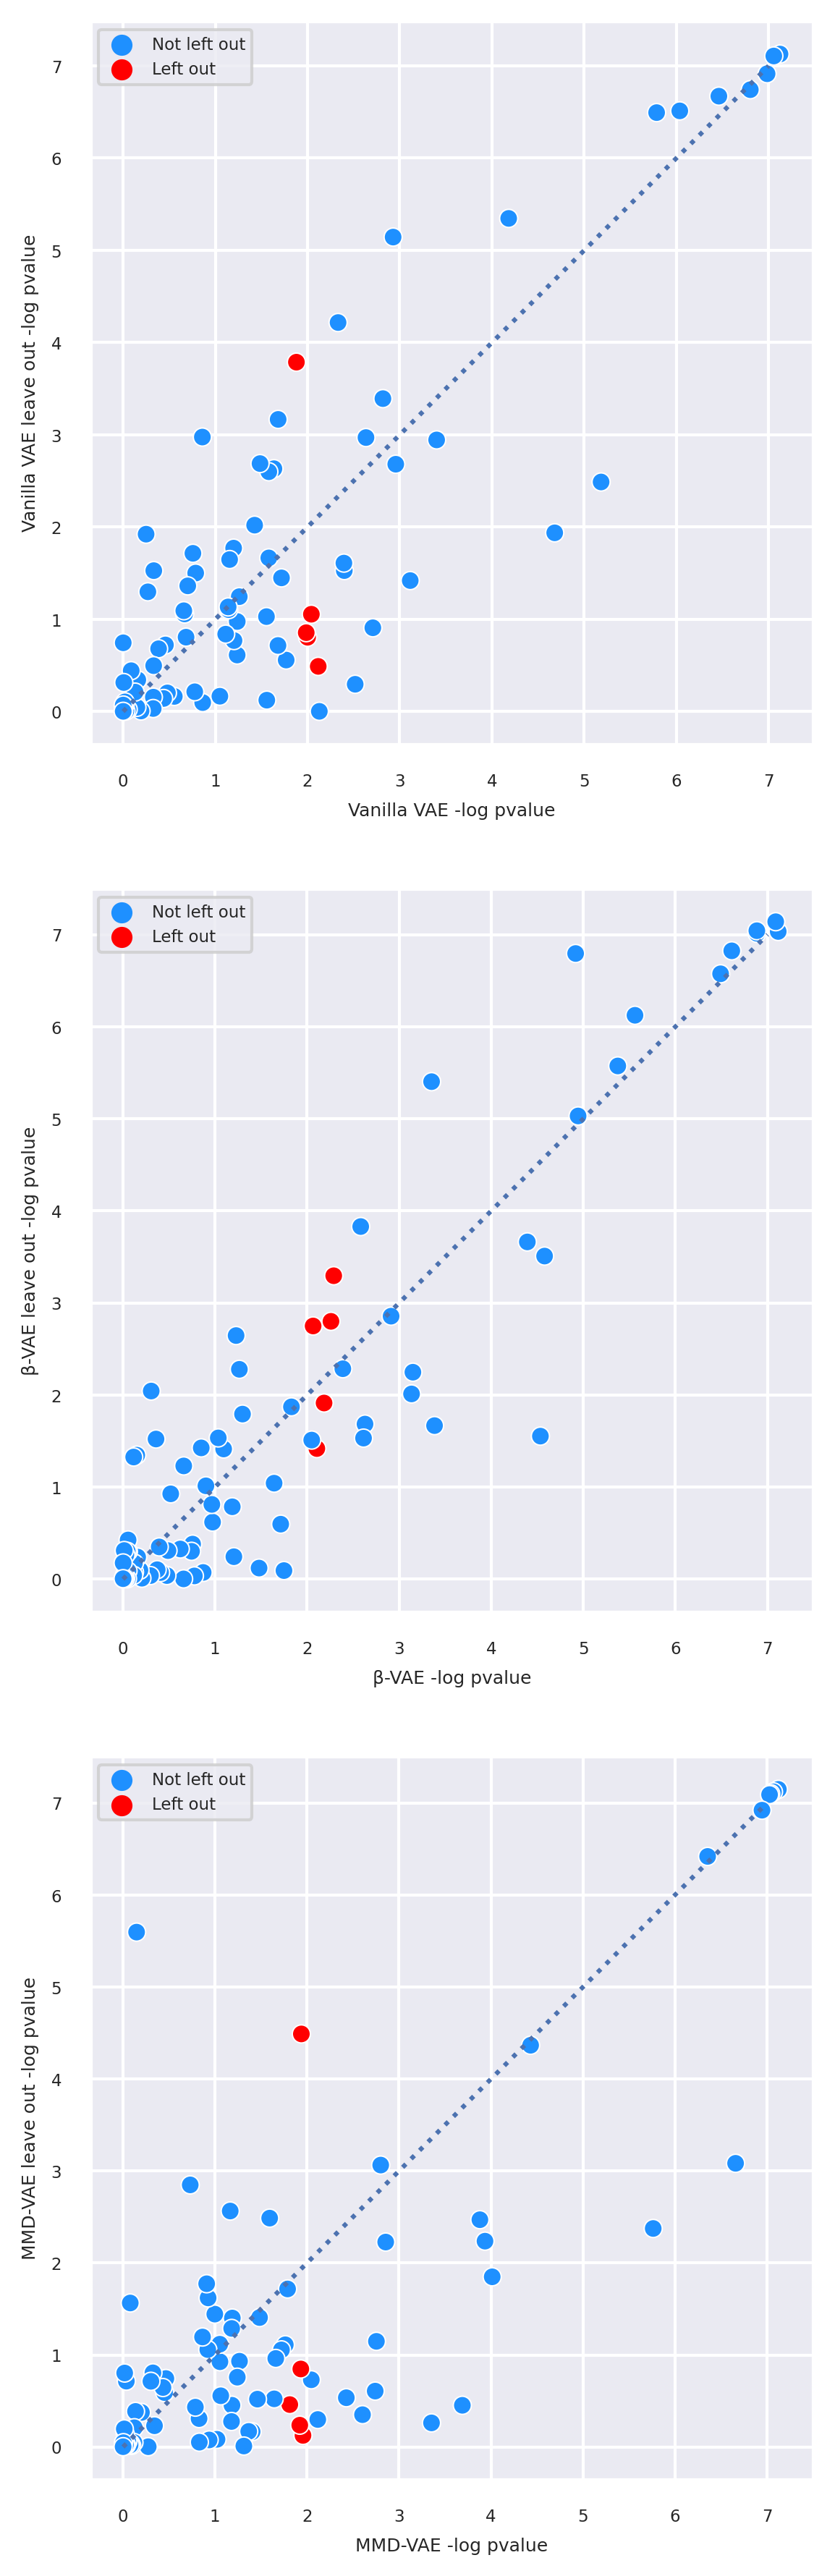

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (8,15), dpi=300)
sns.scatterplot(data = vanilla_df, x = 0, y = 1, hue = '', palette = ['dodgerblue', 'red'], ax = ax1)
sns.scatterplot(data = beta_df, x = 0, y = 1, hue = '', palette = ['dodgerblue', 'red'], ax = ax2)
sns.scatterplot(data = mmd_df, x = 0, y = 1, hue = '', palette = ['dodgerblue', 'red'], ax = ax3)
ax1.axis('square')
ax2.axis('square')
ax3.axis('square')



x = np.arange(0,8)
ax1.plot(x,x,':')
ax2.plot(x,x,':')
ax3.plot(x,x,':')

ax1.set_xlabel('Vanilla VAE -log pvalue')
ax1.set_ylabel('Vanilla VAE leave out -log pvalue')
ax2.set_xlabel('β-VAE -log pvalue')
ax2.set_ylabel('β-VAE leave out -log pvalue')
ax3.set_xlabel('MMD-VAE -log pvalue')
ax3.set_ylabel('MMD-VAE leave out -log pvalue')

